# CNN Model

In this notebook I am going to define the CNN model architecture developed with Keras. In this notebook I limit to show the model functions. <br>
The complete script can be found in the analysis folder 'analysis/30_train_cnn_model' of this repository.

### CNN model architecture

The CNN model is constructed with 9 layers: 8 Conv1D layers followed by a Dense layer.

In [ ]:
def CNN_model(X_input_shape):
    model = Sequential()
    model.add(Conv1D(256, 8, padding='same',input_shape=(X_input_shape, 1)))
    model.add(Activation('relu'))
    model.add(Conv1D(256, 8, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(64, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    # 2-classes
    model.add(Dense(2))
    model.add(Activation('softmax'))
    return model

model = CNN_model(X_train.shape[1])

### Optimizer

As optimizer I used stochastic gradient descent optimizer.

In [ ]:
opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

### Compile model

For loss function I chose the categorical_crossentropy. For evaluation metric I chose accuracy.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### Callbacks

ModelCheckpoint is used to saves the model best weight at some intervals, so the model or weights can be loaded later to continue the training from the state saved.

In [ ]:
mcp_save = ModelCheckpoint(
                        './output/model_checkpoint.h5',
                        save_best_only=True,
                        monitor='val_loss',
                        mode='min')

lr_reduce callback reduces the learning rate when a metric has stopped improving.

In [ ]:
lr_reduce = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=10, min_lr=0.000001)

EarlyStopping callback stops the training once validation loss ceases to decreas. A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the patience.

In [ ]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=5)

CSVLogger callback streams epoch results to a csv file.

In [ ]:
csv_logger = CSVLogger(epoch_log_path, append=True, separator=';')

### Train model

The model is been trained on batch_size=16 and 300 epochs. The validation data x_val, y_val are taken from a 20% of train data using sklearn.model_selection.StratifiedShuffleSplit.

In [ ]:
cnnhistory = model.fit(
                    x_traincnn,
                    y_train,
                    batch_size=16,
                    epochs=500,
                    validation_data=(x_val, y_val),
                    callbacks=[mcp_save, lr_reduce, csv_logger])

### Model loss

The model loss during training is monitored on a validation set. The plots below show the decrease of the loss across training epochs. 

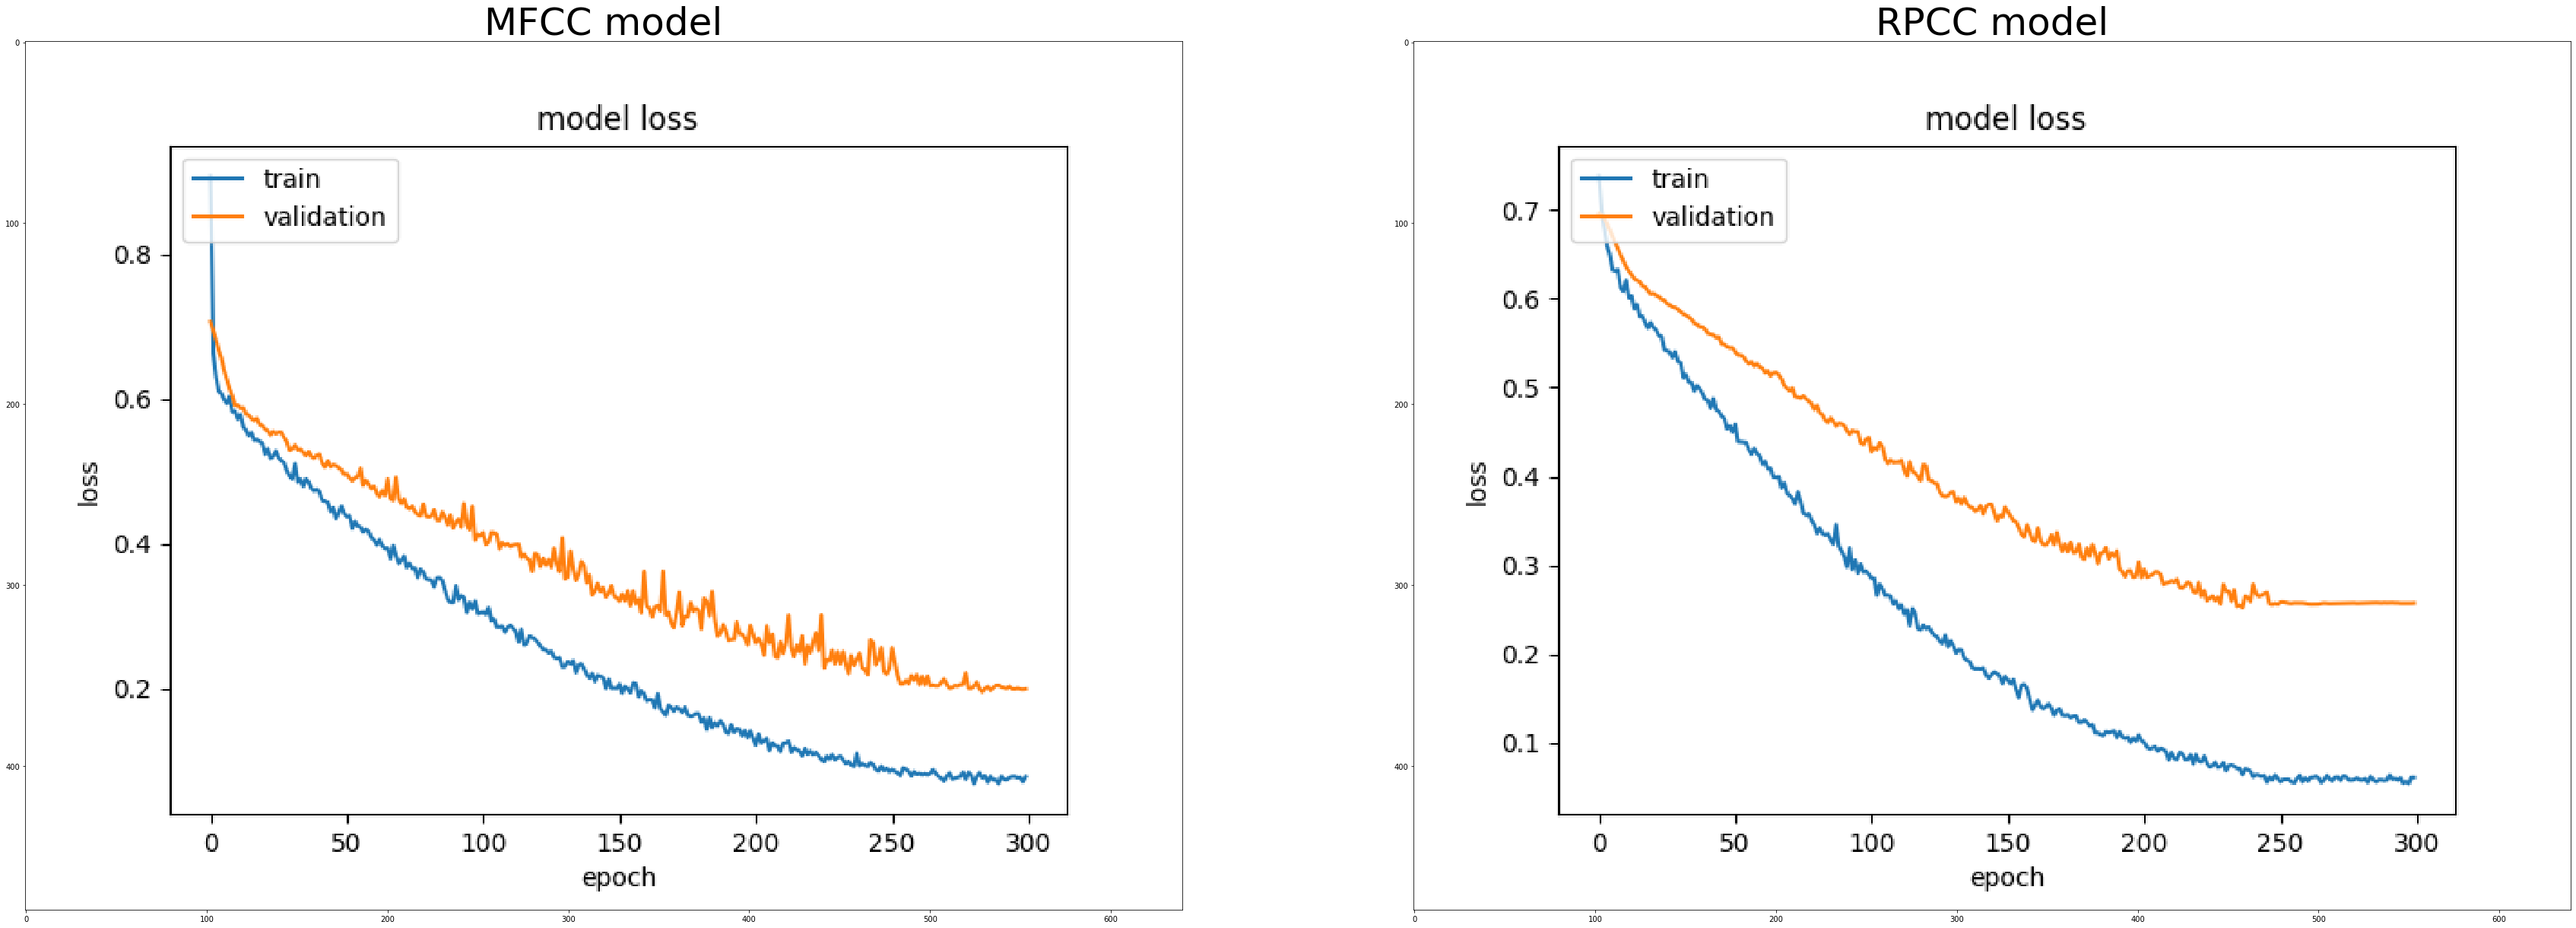

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(60, 40))

plt.subplot(121)
fpath = '../analysis/30_train_cnn_model/10_signal/output/model_loss.png'
img = plt.imread(fpath)
plt.imshow(img)
plt.title('MFCC model', size=50)

plt.subplot(122)
fpath = '../analysis/30_train_cnn_model/20_rp/output/model_loss.png'
img = plt.imread(fpath)
plt.imshow(img)
plt.title('RPCC model', size=50)
plt.show()